## HW3
The objective of the homework is to generate spike-trains from given firing rate as a
function of time.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.load('/Users/pinyu/Documents/HW for 神經科學/HW/Computational-Neuroscience/hw3_generate_spike_train/hw03-data.npz')

print(list(data))

['rates', 'delta_t']


In [3]:
rates = data['rates']
delta_t = data['delta_t']

In [8]:
print(rates.shape)
print(delta_t)

(384,)
0.0078125


## Q1

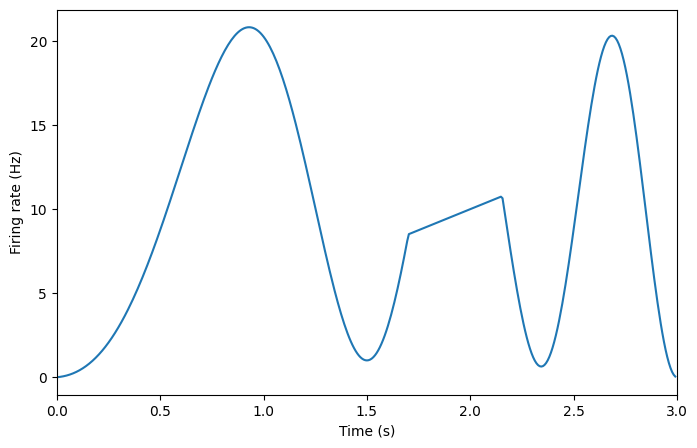

In [22]:
plt.figure(figsize=(8,5))
duration = np.arange(0, len(rates)*delta_t, delta_t)
plt.xlim(0, len(rates)*delta_t)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.plot(duration, rates)


## Q2

Using the “random points in a box”  method as
discussed in the lecture to construct 100 spike trains (100 trials) based on the given rate
function.

In [54]:
num_trials = 100

# 建立一個列表來儲存每個試驗的脈衝時間
spike_trains = []

點陣圖繪製完成。圖形已顯示。


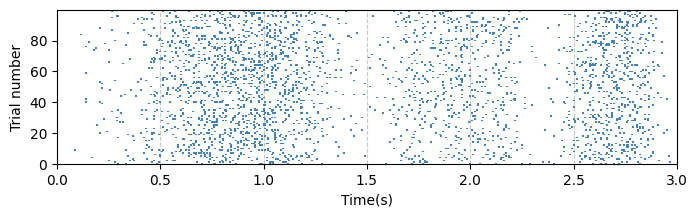

In [17]:
# 對每個試驗內的每個時間步長，生成一個隨機數
# 如果這個隨機數小於 (發射率 * 時間步長)，則該時間步長發生一次脈衝，並將時間點存入current_trial_spikes
#每次trial都會將該列current_trial_spikes的時間列存入spike_trains

for trial in range(num_trials):
    current_trial_spikes = []
    for i, rate in enumerate(rates):
        if np.random.rand() < rate * delta_t:
            current_trial_spikes.append(i * delta_t)
    spike_trains.append(current_trial_spikes)

plt.figure(figsize=(8, 2))
plt.eventplot(spike_trains, color='steelblue', linelengths=1, orientation='horizontal')
plt.xlim(0, 3)
plt.ylim(0, num_trials)
plt.xlabel('Time(s)')
plt.ylabel('Trial number')
plt.yticks(ticks=np.arange(0, num_trials, 20), labels=np.arange(0, num_trials, 20))
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

print("點陣圖繪製完成。圖形已顯示。")

## Q3

Transform the stimulated spike train back into firing rate(using gaussian window), and compare with the original firing rate.

In [52]:
spikes = spike_trains[99]
frame_dt = 0.0001
frame_times = np.arange(0, 3, frame_dt)

In [53]:
frames = np.zeros_like(frame_times)

for spike in spikes:
    frames[(spike/frame_dt).astype(int)] = 1

In [56]:
new_spike_time = []
for i, sti in enumerate(frames):
    if sti == 1:
        new_spike_time.append(i * frame_dt)

In [43]:
sigma = 0.1 # 標準差 (s)
kernel_length = int(8 * sigma / frame_dt)
if kernel_length % 2 == 0:
    kernel_length += 1
kernel_times = np.arange(-kernel_length // 2, kernel_length // 2 + 1) * frame_dt
gaussian_kernel = np.exp(-0.5 * (kernel_times / sigma)**2)
gaussian_kernel /= np.sum(gaussian_kernel) # 歸一化核心，使其總和為1

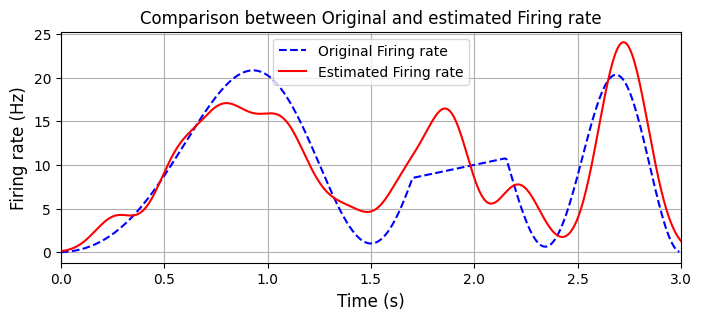

In [65]:
convolved_rate = np.convolve(frames, gaussian_kernel, mode='same') / frame_dt


plt.figure(figsize=(8, 3))
plt.xlim(0, 3)

original_rate_times = np.arange(0, 3, delta_t)
plt.plot(duration, rates, 'b--', label='Original Firing rate')

plt.plot(frame_times, convolved_rate, 'r-', label='Estimated Firing rate')

plt.title('Comparison between Original and estimated Firing rate', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Firing rate (Hz)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### Method two for Q3

In [57]:
def gau_win(x_points,sigma):
    '''Gaussian window function

    Parameters
    ----------
    x_points :  Positions
       sigma :  Standard deviation
    '''
    return np.exp(-(x_points/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

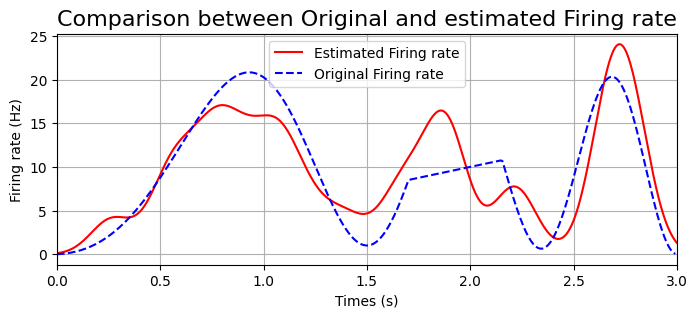

In [63]:
rates_3 = np.array([gau_win(t-new_spike_time,0.1).sum() for t in frame_times])
plt.figure(figsize=(8,3))
plt.plot(frame_times, rates_3, 'r-', label='Estimated Firing rate')

original_rate_times = np.arange(0, 3, delta_t)
plt.plot(duration, rates, 'b--', label='Original Firing rate')

plt.title('Comparison between Original and estimated Firing rate', fontsize=16)
plt.legend()
plt.grid(True)
plt.xlim(0,3)
plt.xlabel('Times (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()